# Computational Guided Inquiry for Polar Research

## Processing Sea Ice Images - 4. Arctic sea ice images

### Activity overview
1. Learn how to view images of Arctic sea ice taken by the MODIS instrument.
2. Learn how to download an image onto your computer.
3. Learn how to load an image into the Jupyter Notebook.
4. Examine annual and long-term trends in Arctic and Antarctic sea ice.

### Pre-class activities
1. Read the Introduction.
2. Go to the MODIS website, read about the MODIS instrument, and examine some of the images.
3. Bookmark your favorite image.
2. Define the terms anthropogenic, albedo, and positive feedback.



### Introduction

_Climate connection_  

As we saw previously, the MODIS instrument produces color images of the Earth. However, since clouds, snow, and ice are all white, it is difficult to distinguish between them in an image. Fortunately, the MODIS instrument can "see" other colors in addition to those we can see. Scientists measure color as the wavelength of electromagnetic radiation. 

Here is what an article on the NASA website, by Holli Riebeek, says about it:

<blockquote cite="https://earthobservatory.nasa.gov/Features/FalseColor/page1.php">
Though they may look similar, photographs and satellite images are fundamentally different. A photograph is made when light is focused and captured on a light-sensitive surface (such as film or a CCD). A satellite image is created by combining measurements of the intensity of certain wavelengths of light, both visible and invisible to human eyes ... so images made from other wavelengths of light look unnatural to us. We call these images “false-color,” and to understand what they mean, it’s necessary to understand exactly what a satellite image is.

<br> <br> Satellite instruments carry many sensors that are each tuned to a narrow range, or “band,” of wavelengths (just red or green light, for instance). To make a satellite image, we choose three bands and represent each in tones of red, green, or blue. Because most visible colors can be created by combining red, green, and blue light, we then combine the red, green, and blue-scale images to get a full-color representation of the world.

<br> <br> A natural or “true-color” image combines actual measurements of red, green, and blue light. The result looks like the world as humans see it.

<br> <br> A false-color image uses at least one non-visible wavelength, though that band is still represented in red, green, or blue. As a result, the colors in the final image may not be what you expect them to be. (For instance, grass isn’t always green.) Such false-color band combinations reveal unique aspects of the land or sky that might not be visible otherwise.

</blockquote>

The quoted text above is an abbreviated version of the original article; you can read a lot more about satellite images here: <cite="https://earthobservatory.nasa.gov/Features/FalseColor/page1.php">. 

In this activity, we will use a false-color image of the Arctic to distinguish various surface and cloud types in a MODIS false-color image made from blue and two wavelengths of shortwave infrared radiation.

### The Arctic Image

For this activity, you will work with a true-color image, IceImage.jpg, and a false-color image: Iceimage2.jpg

<False-color: Blue = 488 nm = M3, SWIR = 1610 nm = I3, SWIR = 2250 nm = M11>


In [8]:
# Following are the modules we will need.
import matplotlib.pyplot as plt
import imageio
import copy
import numpy as np

%matplotlib notebook

### Load and plot the true- and false-color images

<IPython.core.display.Javascript object>


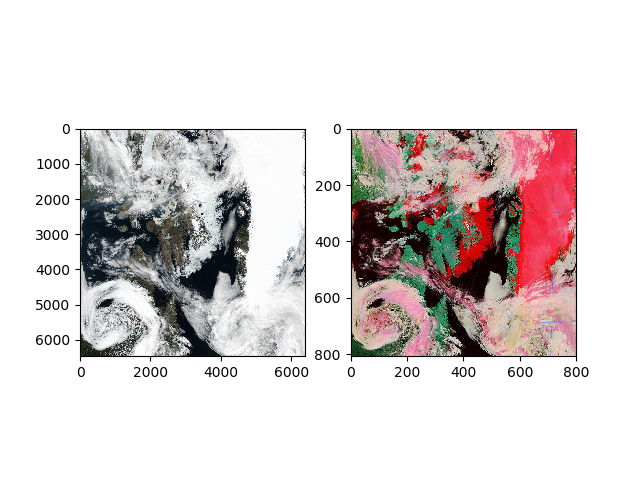

(-0.5, 799.5, 807.5, -0.5)

In [14]:
myimage = imageio.imread('IceImage.jpg') 
myImage2 = imageio.imread('IceImage2.jpg')

plt.figure()
plt.subplot(121)
plt.imshow(myimage)
#plt.axis('off')     # Remove axis ticks and numbers
plt.axis('image')    # Set aspect ratio to obtain square pixels.

plt.subplot(122)
plt.imshow(myImage2)
#plt.axis('off')     # Remove axis ticks and numbers
plt.axis('image')    # Set aspect ratio to obtain square pixels.

Make a note of what color in the false-color image you think corresponds to water, ice, cloud, snow-covered land, and bare land. What might explain the difference between what appear to be white and peach colored clouds in the false-color image?

<IPython.core.display.Javascript object>


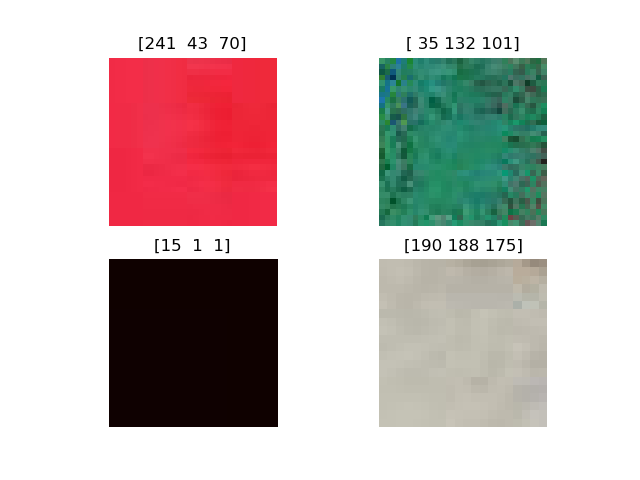

Text(0.5,1,'[190 188 175]')

In [15]:
# Show a few colors
plt.figure()
plt.subplot(221); 
plt.imshow(myImage2[40:70,-70:-40,:]); plt.axis('off'); plt.axis('image'); plt.title(str(myImage2[40,-70,:]))

plt.subplot(222); 
plt.imshow(myImage2[380:410,330:360,:]); plt.axis('off'); plt.axis('image'); plt.title(str(myImage2[395,345,:]))

plt.subplot(223); 
plt.imshow(myImage2[530:550,450:470]); plt.axis('off'); plt.axis('image'); plt.title(str(myImage2[540,460,:]))

plt.subplot(224); 
plt.imshow(myImage2[570:590,520:540,:]); plt.axis('off'); plt.axis('image'); plt.title(str(myImage2[580,530,:]))



<IPython.core.display.Javascript object>


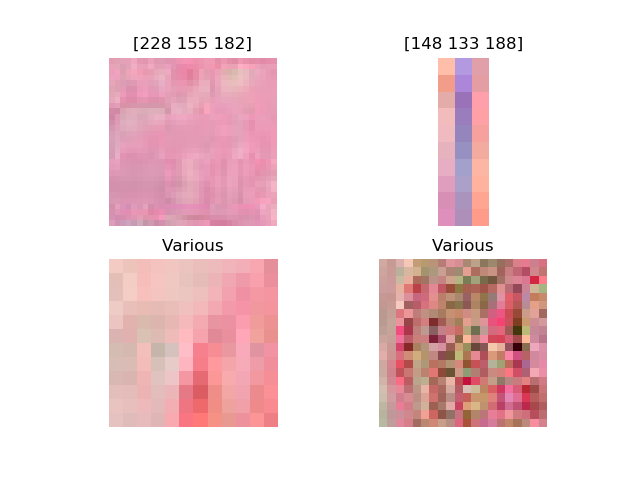

Text(0.5,1,'Various')

In [6]:
# Show a few more colors
plt.figure()
plt.subplot(221); 
plt.imshow(myImage2[590:620,150:180,:]); plt.axis('off'); plt.axis('image'); plt.title(str(myImage2[605,165,:]))

plt.subplot(222); 
plt.imshow(myImage2[166:176,618:621,:]); plt.axis('off'); plt.axis('image'); plt.title(str(myImage2[170,619,:]))

plt.subplot(223); 
plt.imshow(myImage2[170:182,590:602,:]); plt.axis('off'); plt.axis('image'); plt.title('Various')

plt.subplot(224); 
plt.imshow(myImage2[660:680,54:74,:]); plt.axis('off'); plt.axis('image'); plt.title('Various')


### Check your categories against NASA:

<blockquote cite="https://earthobservatory.nasa.gov/Features/FalseColor/page1.php">
Occasionally, the Earth Observatory will publish a band combination that assigns blue light to be red and two different shortwave infrared bands to green and blue. This band combination is especially valuable in distinguishing snow, ice, and clouds. Ice reflects more blue light than snow or ice clouds. Ice on the ground will be bright red in this false color, while snow is orange, and clouds range from white to dark peach.
</blockquote>

<br>It turns out that, in the picture:

bright red => ice  
orange => snow  
white to dark peach => clouds  
bright blue => lines of latitude and longitude
green => bare ground
black => ocean  




### Identify the pixels corresponding to each color.

Here we will create indices corresponding to the pixels of each color.

In [16]:
# Finding indices is easier if we reshape the 3-D matrix into a 2-D matrix, where 
# the first dimension is each row in order and the second is the color
r = np.ravel(myImage2[:,:,0])
g = np.ravel(myImage2[:,:,1])
b = np.ravel(myImage2[:,:,2])


<IPython.core.display.Javascript object>


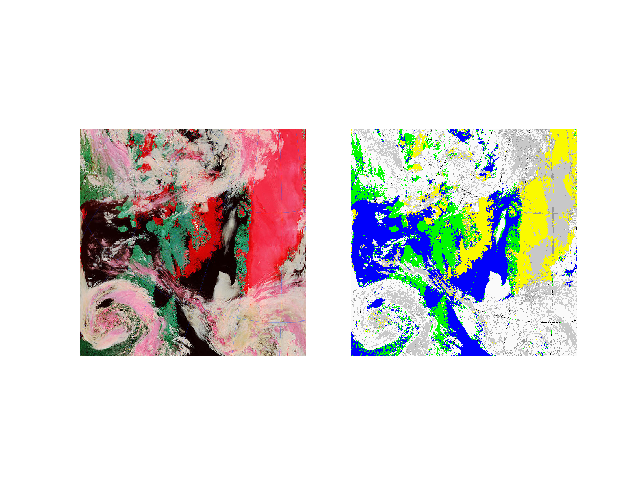

(-0.5, 799.5, 807.5, -0.5)

In [17]:
# A function for getting indices to the matrix that are all within a range
def getIndicesForColorRanges(r,g,b,redrange,greenrange,bluerange):
    
    ired = np.where(np.logical_and(r>=redrange[0], r<=redrange[1]))[0]
    igrn = np.where(np.logical_and(g>=greenrange[0], g<=greenrange[1]))[0]
    iblu = np.where(np.logical_and(b>=bluerange[0], b<=bluerange[1]))[0]
                    
    ind = np.intersect1d(np.intersect1d(ired,igrn),iblu)

    return ind


# black: 15, 1, 1,
# green: 35, 132, 101
# red: 241, 43, 70
# pink: 228, 155, 128
# white: 190, 188, 175
# latlon: 148, 133, 188

# red => ice  
# orange => snow  
# white to dark peach => clouds  
# bright blue => lines of latitude and longitude
# green => bare ground
# black => ocean  


# Choose unique colors
iblack  = getIndicesForColorRanges(r, g, b, [  0, 125], [  0,  80], [   0,  80])   # black
iblue   = getIndicesForColorRanges(r, g, b, [  0, 125], [  0,  80], [  81, 250])   # blue
igreen1 = getIndicesForColorRanges(r, g, b, [  0, 125], [ 81, 125], [   0, 250])   # green
igreen2 = getIndicesForColorRanges(r, g, b, [  0, 125], [126, 250], [   0, 250])   # green-blue

iice    = getIndicesForColorRanges(r, g, b, [126, 250], [  0, 125], [  0,  80]) # red
ipink1  = getIndicesForColorRanges(r, g, b, [126, 250], [  0, 125], [ 81, 125]) # pink
ipurple = getIndicesForColorRanges(r, g, b, [126, 250], [  0, 125], [126, 250]) # purple
igray   = getIndicesForColorRanges(r, g, b, [126, 250], [126, 250], [  0, 125]) # gray
iwhite1 = getIndicesForColorRanges(r, g, b, [126, 200], [126, 250], [126, 200]) # white/gray
ilatlon = getIndicesForColorRanges(r, g, b, [126, 200], [126, 250], [201, 250]) # ???

ipink2   = getIndicesForColorRanges(r, g, b, [201, 250], [126, 150], [126, 182]) # pink
iwhite2  = getIndicesForColorRanges(r, g, b, [201, 250], [126, 150], [183, 250]) # white
iwhite3  = getIndicesForColorRanges(r, g, b, [201, 250], [151, 195], [126, 182]) # white
ipink3   = getIndicesForColorRanges(r, g, b, [201, 250], [126, 195], [183, 200]) # pink
iwhite4  = getIndicesForColorRanges(r, g, b, [201, 250], [126, 195], [201, 250]) # ???
iwhite5  = getIndicesForColorRanges(r, g, b, [201, 250], [196, 250], [183, 250]) # white

# Choose scene types
iground = np.union1d(np.union1d(iblue,igreen1),igreen2)
icloud  = np.union1d(np.union1d(np.union1d(np.union1d(np.union1d(iwhite1,iwhite2),iwhite3),iwhite4),iwhite5),igray)
icloud2 = np.union1d(np.union1d(ipink1,np.union1d(ipink2,ipink3)),ipurple)
iocean  = iblack



# Reshape as a matrix with one vector for each color
myImage3 = copy.deepcopy(myImage2).reshape((646400,3))

# Make an all-red image
myImage3[:,0] = 150; myImage3[:,1] = 150; myImage3[:,2] = 150  # Background = grey

# Now color the image according to the indices
myImage3[iocean,:] = [0, 0, 250]        # Color Ocean blue
myImage3[iground,:] = [0, 250, 0]       # Land = blues and greens
myImage3[iice,:]    = [250, 250, 0]     # Color ice yellow
myImage3[icloud,:]  = [250, 250, 250]   # Color cloud white
myImage3[icloud2,:] = [200, 200, 200]   # Color pink cloud light gray
myImage3[ilatlon,:] = [0, 0, 0]       # Color lines of latitude and longitude black

myImage3 = myImage3.reshape(808,800,3)

plt.figure()
plt.subplot(121)
plt.imshow(myImage2)
plt.axis('off'); plt.axis('image')   

plt.subplot(122)
plt.imshow(myImage3)
plt.axis('off'); plt.axis('image')   


### Fractional areas of surface and cloud types:

In [18]:
# Now color the image according to the indices
Npixels = myImage2.shape[0]*myImage2.shape[1] +0.  
print('Fraction ocean: ' + str(len(iocean)/Npixels))
print('Fraction bare ground: ' + str(len(iground)/Npixels))
print('Fraction ice: ' + str(len(iice)/Npixels))
print('Fraction cloud: ' + str((len(icloud)+len(icloud2))/Npixels))
print('Fraction lines of latitude/longitude: ' + str(len(ilatlon)/Npixels))
print('Fraction unidentified: ' + str(1-
       (len(iocean)+len(iground)+len(iice)+len(icloud)+len(icloud2)+len(ilatlon))/Npixels))




Fraction ocean: 0.19126237623762377
Fraction bare ground: 0.11836014851485148
Fraction ice: 0.1242450495049505
Fraction cloud: 0.5363675742574258
Fraction lines of latitude/longitude: 0.0025479579207920793
Fraction unidentified: 0.027216893564356415


### Describe how you might remove the lines of latitude and longitude from the figure so that those pixels could be categorized.